In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv
url = "https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv"
df = pd.read_csv(url)

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [3]:
#Q2-Get first 2 rows of data
df.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [4]:
#Q3-Check if there is missing value
df.isnull().sum()

,0
Carat Weight,0
Cut,0
Color,0
Clarity,0
Polish,0
Symmetry,0
Report,0
Price,0


In [9]:
#Q4- Get data information and number of rows and columns
df.info()
print("-----------------------")
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB
-----------------------


(6000, 8)

In [10]:
#Q5-Get descriptive statistics of data
df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


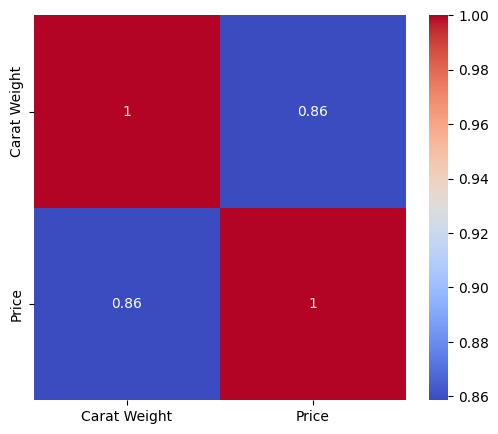

In [11]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(6,5))   # smaller figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

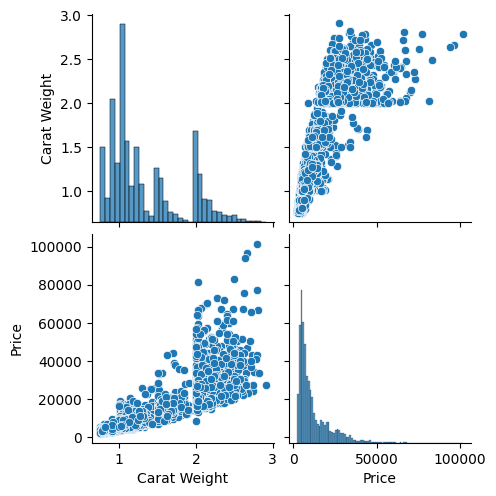

In [12]:
#Q7-Use seasoborns paiplot to generate following  diagram
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

In [13]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)
X = df.drop("Price", axis=1)
Y = df["Price"]

In [14]:
#Q9-Create dummy for the input variables (X)
X = pd.get_dummies(X, drop_first=True)

In [18]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

In [19]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [25]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
model = LinearRegression()
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
print("--------Train--------")
print("Train MAE:", mean_absolute_error(Y_train, Y_train_pred))
print("Train MSE:", mean_squared_error(Y_train, Y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
print("Train R2:", r2_score(Y_train, Y_train_pred))
print("--------Test--------")
print("Test MAE:", mean_absolute_error(Y_test, Y_test_pred))
print("Test MSE:", mean_squared_error(Y_test, Y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
print("Test R2:", r2_score(Y_test, Y_test_pred))

--------Train--------
Train MAE: 2420.3923973752335
Train MSE: 13617878.611029424
Train RMSE: 3690.240996334714
Train R2: 0.8677546171602643
--------Test--------
Test MAE: 2386.8817587054814
Test MSE: 16395263.35943688
Test RMSE: 4049.1064890216066
Test R2: 0.8461544250476118


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?

Since the performance metrics R² and error values for train and test data are close to each other, there is no significant overfitting in the linear regression model.

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [30]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)
Y_train_pred_lasso = lasso_model.predict(X_train)
Y_test_pred_lasso = lasso_model.predict(X_test)
print("--------Train--------")
print("Train MAE:", mean_absolute_error(Y_train, Y_train_pred_lasso))
print("Train MSE:", mean_squared_error(Y_train, Y_train_pred_lasso))
print("Train RMSE:", np.sqrt(mean_squared_error(Y_train, Y_train_pred_lasso)))
print("Train R2:", r2_score(Y_train, Y_train_pred_lasso))
print("--------Test--------")
print("Test MAE:", mean_absolute_error(Y_test, Y_test_pred_lasso))
print("Test MSE:", mean_squared_error(Y_test, Y_test_pred_lasso))
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_test_pred_lasso)))
print("Test R2:", r2_score(Y_test, Y_test_pred_lasso))
print("")

--------Train--------
Train MAE: 2423.671294929327
Train MSE: 13634771.172894873
Train RMSE: 3692.529102511566
Train R2: 0.8675905708080498
--------Test--------
Test MAE: 2389.974136155326
Test MSE: 16382531.14330739
Test RMSE: 4047.5339582648826
Test R2: 0.8462738982800886



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.937e+10, tolerance: 4.943e+07
  model = cd_fast.enet_coordinate_descent(


In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [36]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, Y_train)
Y_train_pred_ridge = ridge_model.predict(X_train)
Y_test_pred_ridge = ridge_model.predict(X_test)
print("--------Train--------")
print("Train MAE:", mean_absolute_error(Y_train, Y_train_pred_ridge))
print("Train MSE:", mean_squared_error(Y_train, Y_train_pred_ridge))
print("Train RMSE:", np.sqrt(mean_squared_error(Y_train, Y_train_pred_ridge)))
print("Train R2:", r2_score(Y_train, Y_train_pred_ridge))
print("--------Test--------")
print("Test MAE:", mean_absolute_error(Y_test, Y_test_pred_ridge))
print("Test MSE:", mean_squared_error(Y_test, Y_test_pred_ridge))
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_test_pred_ridge)))
print("Test R2:", r2_score(Y_test, Y_test_pred_ridge))

--------Train--------
Train MAE: 2423.923392207977
Train MSE: 13633584.50174035
Train RMSE: 3692.3684135985604
Train R2: 0.867602094760173
--------Test--------
Test MAE: 2390.3505348630265
Test MSE: 16383152.01288278
Test RMSE: 4047.6106548039893
Test R2: 0.8462680723269032


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why?

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [38]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
Y_train_pred_dt = dt_model.predict(X_train)
Y_test_pred_dt = dt_model.predict(X_test)
print("--------Train--------")
print("Train MAE:", mean_absolute_error(Y_train, Y_train_pred_dt))
print("Train MSE:", mean_squared_error(Y_train, Y_train_pred_dt))
print("Train RMSE:", np.sqrt(mean_squared_error(Y_train, Y_train_pred_dt)))
print("Train R2:", r2_score(Y_train, Y_train_pred_dt))
print("--------Test--------")
print("Test MAE:", mean_absolute_error(Y_test, Y_test_pred_dt))
print("Test MSE:", mean_squared_error(Y_test, Y_test_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_test_pred_dt)))
print("Test R2:", r2_score(Y_test, Y_test_pred_dt))

--------Train--------
Train MAE: 77.53468948412699
Train MSE: 83753.97633482143
Train RMSE: 289.40279254841585
Train R2: 0.999186651828738
--------Test--------
Test MAE: 888.5465218253969
Test MSE: 3377642.2571009025
Test RMSE: 1837.836297688372
Test R2: 0.9683057659010963


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [41]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, Y_train)
Y_train_pred_rf = rf_model.predict(X_train)
Y_test_pred_rf = rf_model.predict(X_test)
print("--------Train--------")
print("Train MAE:", mean_absolute_error(Y_train, Y_train_pred_rf))
print("Train MSE:", mean_squared_error(Y_train, Y_train_pred_rf))
print("Train RMSE:", np.sqrt(mean_squared_error(Y_train, Y_train_pred_rf)))
print("Train R2:", r2_score(Y_train, Y_train_pred_rf))
print("--------Test--------")
print("Test MAE:", mean_absolute_error(Y_test, Y_test_pred_rf))
print("Test MSE:", mean_squared_error(Y_test, Y_test_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_test_pred_rf)))
print("Test R2:", r2_score(Y_test, Y_test_pred_rf))

--------Train--------
Train MAE: 315.2863189831003
Train MSE: 459930.07480541855
Train RMSE: 678.181446815982
Train R2: 0.995533545968541
--------Test--------
Test MAE: 664.0046578063602
Test MSE: 1662704.1117658145
Test RMSE: 1289.4588445413117
Test R2: 0.9843979529671247


Q18-Why Random forest perform better than Decison Tree on test data?

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?
